In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from Classes.Artifact import Artifact
from Classes.Artist import Artist
from Classes.Collection import Collection
from Classes.ArtifactRoman import ArtifactRoman
from Classes.ArtifactGreek import ArtifactGreek
from Classes.utils import visualize_rdf_graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv("../Data/MetObjects_Cleaned.csv", low_memory=False)

In [6]:
df[df["Artist Wikidata URL"].notna()]

,Unnamed: 0,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Medium,Classification,...,Tags,Tags AAT URL,Tags Wikidata URL,Artist Display Name,Artist Wikidata URL,Artist ULAN URL,Artist Nationality,Dimensions,first_cm_raw,cm_value
363,139375,239950,Greek and Roman Art,1874-01-01,"Oinochoe, fragmentary",Fragment of a terracotta oinochoe (jug),"East Greek, Milesian, Fikellura",Archaic,Terracotta,Vases,...,"['Birds', 'Griffins', 'Sphinx', 'Deer', 'Lions']","['http://vocab.getty.edu/page/aat/300266506', ...","['https://www.wikidata.org/wiki/Q5113', 'https...",['Altenburg Painter'],https://www.wikidata.org/wiki/Q436826,http://vocab.getty.edu/page/ulan/500046500,NaN,H. of a 5 3/4 in. (14.6 cm); length of b 3 1/2...,14.6 cm,14.6
837,139849,240426,Greek and Roman Art,1874-01-01,Oinochoe,Terracotta oinochoe (jug),"Greek, Euboean",Geometric,Terracotta,Vases,...,['Horses'],['http://vocab.getty.edu/page/aat/300250148'],['https://www.wikidata.org/wiki/Q726'],['Cesnola Painter'],https://www.wikidata.org/wiki/Q18704770,NaN,NaN,H. 14 1/16 in. (35.7 cm),35.7 cm,35.7
964,139976,240553,Greek and Roman Art,1874-01-01,"Krater, four-handled with lid",Terracotta krater with lid surmounted by a sma...,"Greek, Euboean",Geometric,Terracotta,Vases,...,"['Deer', 'Horses', 'Axes', 'Birds']","['http://vocab.getty.edu/page/aat/300250308', ...","['https://www.wikidata.org/wiki/Q685795', 'htt...",['Cesnola Painter'],https://www.wikidata.org/wiki/Q18704770,NaN,NaN,51 1/2 in. (130.8 cm)\r\nOther: 71 1/2 in. (18...,130.8 cm,130.8
1372,140384,240961,Greek and Roman Art,1874-01-01,"Kylix, band-cup fragment",Fragment of a kylix: band-cup (drinking cup),"Greek, Attic",Archaic,Terracotta,Vases,...,['Human Figures'],['http://vocab.getty.edu/page/aat/300404114'],['https://www.wikidata.org/wiki/Q5937779'],['Elbows Out'],https://www.wikidata.org/wiki/Q1325382,http://vocab.getty.edu/page/ulan/500030612,NaN,Overall: 1 3/4 x 3 15/16in. (4.5 x 10cm),4.5 x 10cm,NaN
5136,144148,244742,Greek and Roman Art,1874-01-01,"Kylix, band-cup fragment",Fragment of a kylix: band-cup (drinking cup),"Greek, Attic",Archaic,Terracotta,Vases,...,['Human Figures'],['http://vocab.getty.edu/page/aat/300404114'],['https://www.wikidata.org/wiki/Q5937779'],['Elbows Out'],https://www.wikidata.org/wiki/Q1325382,http://vocab.getty.edu/page/ulan/500030612,NaN,width 3 3/8in. (8.6cm),8.6cm,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33647,452637,776292,Greek and Roman Art,2011-01-01,Kylix fragment,Terracotta fragment of a kylix (drinking cup),"Greek, Attic",Classical,Terracotta,Vases,...,NaN,NaN,NaN,['Aberdeen Painter'],https://www.wikidata.org/wiki/Q18670007,http://vocab.getty.edu/page/ulan/500011950,NaN,NaN,NaN,NaN
33696,462216,813052,Greek and Roman Art,1910-01-01,Cup,Cu,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,['Emile Gilliéron'],https://www.wikidata.org/wiki/Q15446670,(not assigned),['Swiss'],NaN,NaN,NaN
33697,462503,813551,Greek and Roman Art,1914-01-01,136 plaster impressions,White plaster impressions of engraved sealstones,NaN,NaN,plaster,NaN,...,NaN,NaN,NaN,['Emile Gilliéron'],https://www.wikidata.org/wiki/Q15446670,(not assigned),['Swiss'],NaN,NaN,NaN
33698,462504,813553,Greek and Roman Art,1914-01-01,99 plaster impressions,White plaster impressions of sealings,NaN,NaN,plaster,NaN,...,NaN,NaN,NaN,['Emile Gilliéron'],https://www.wikidata.org/wiki/Q15446670,(not assigned),['Swiss'],NaN,NaN,NaN


In [ ]:
df.loc[363]

Unnamed: 0                                                        139375
Object ID                                                         239950
Department                                           Greek and Roman Art
AccessionYear                                                 1874-01-01
Object Name                                        Oinochoe, fragmentary
Title                            Fragment of a terracotta oinochoe (jug)
Culture                                  East Greek, Milesian, Fikellura
Period                                                           Archaic
Medium                                                        Terracotta
Classification                                                     Vases
Credit Line            The Cesnola Collection, Purchased by subscript...
Object Wikidata URL             https://www.wikidata.org/wiki/Q116297419
Tags                    ['Birds', 'Griffins', 'Sphinx', 'Deer', 'Lions']
Tags AAT URL           ['http://vocab.getty.edu/pag

# Create, Analyze and Visualize Artifact

In [13]:
artifact = Artifact.from_dataframe(df, 363)

In [14]:
artifact.objectName, artifact.accessionYear, artifact.tagsWikidataURL, artifact.culture, artifact.author_name

('Oinochoe, fragmentary',
 1874,
 ['https://www.wikidata.org/wiki/Q5113',
  'https://www.wikidata.org/wiki/Q130223',
  'https://www.wikidata.org/wiki/Q151480',
  'https://www.wikidata.org/wiki/Q685795',
  'https://www.wikidata.org/wiki/Q140'],
 'East Greek, Milesian, Fikellura',
 'Altenburg Painter')

In [30]:
graph = artifact.to_rdf()
print(graph.serialize(format="turtle"))

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .




In [31]:
type(artifact.tagsWikidataURL)

list

In [32]:
artifact.wikidata_enrich()

In [33]:
graph = artifact.to_rdf()
print(graph.serialize(format="turtle"))

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .

<https://www.wikidata.org/wiki/Q160730> rdfs:comment "in Greek mythology, one of the three Gorgons, described as a woman with snakes i

In [34]:
artifact.similar_artworks()

[{'source': 'Chicago',
  'title': 'Statue of the Aphrodite of Knidos',
  'date': '2nd century',
  'url': 'https://www.artic.edu/artworks/61600'},
 {'source': 'Chicago',
  'title': 'Denarius (Coin) Depicting the God Apollo',
  'date': '90 BCE',
  'url': 'https://www.artic.edu/artworks/9978'},
 {'source': 'Chicago',
  'title': 'Fragment of a Necklace',
  'date': '3rd century',
  'url': 'https://www.artic.edu/artworks/845'},
 {'source': 'Chicago',
  'title': 'Aureus (Coin) Portraying Emperor Gordian III',
  'date': '239 (late July-December), issued by Gordian III',
  'url': 'https://www.artic.edu/artworks/5704'},
 {'source': 'Chicago',
  'title': 'Bottle',
  'date': '1st century',
  'url': 'https://www.artic.edu/artworks/532'},
 {'source': 'Cleveland',
  'title': 'Fragment of a Mold for Arretine Bowl',
  'date': '27 BCE–14 CE',
  'url': 'https://clevelandart.org/art/1916.2009'},
 {'source': 'Cleveland',
  'title': 'Statue of an Athlete',
  'date': '1–100 CE',
  'url': 'https://clevelandar

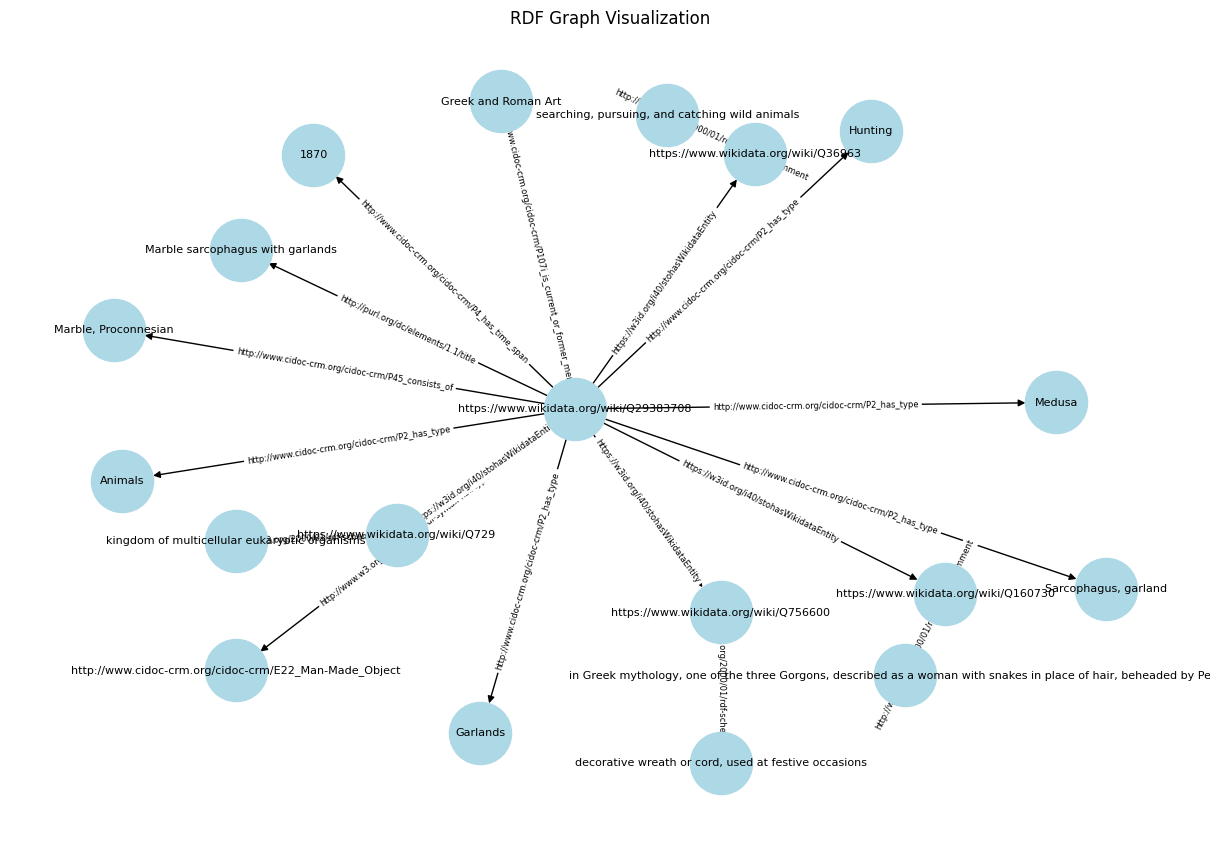

In [35]:
visualize_rdf_graph(artifact.to_rdf())

# Create special artifacts

In [36]:
roman = ArtifactRoman.from_dataframe(df, 0)

In [37]:
roman.print_rdf()

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Roman Empire",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q2277>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .




In [38]:
greek = ArtifactGreek.from_dataframe(df, 1)